Sakshi Mude

Northeastern University

## Introduction

In this analysis, we aim to understand why a magazine publisher's revenues have been declining by examining a dataset with 29 columns and 2240 rows. Our goal is to identify the publisher's frequent subscribers, like other businesses, by using various techniques, including logistic regression, support vector machines, and decision trees. The dataset is composed mainly of two categorical variables: education and marital status, while the rest of the data are either binary or numerical. By analyzing this dataset, we hope to gain insights that will help the publisher improve its subscription rates and revenue.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
from sklearn import metrics
from sklearn import svm



In [2]:
marketing_data = pd.read_csv("/users/sakshi/Downloads/marketing_campaign-1.csv")



In [3]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
marketing_data.shape

(2240, 29)

In [5]:
marketing_data['AcceptedCmp1'].value_counts()

0    2096
1     144
Name: AcceptedCmp1, dtype: int64

In [6]:
marketing_data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### Data Cleaning
The dataset contains 29 columns and 2240 rows with a relatively clean and consistent structure that allows 
for easy modeling. However, some missing values are present, particularly in the Income column where 24 entries 
are incomplete. In this situation, we opt to remove these missing values from the dataset since they constitute a 
small fraction of the overall data. Additionally, we have checked for duplicated values in the dataset to ensure 
data integrity.

In [7]:
# Checking Null values
marketing_data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
marketing_data.isna().count()

ID                     2240
Year_Birth             2240
Education              2240
Marital_Status         2240
Income                 2240
Kidhome                2240
Teenhome               2240
Dt_Customer            2240
Recency                2240
MntWines               2240
MntFruits              2240
MntMeatProducts        2240
MntFishProducts        2240
MntSweetProducts       2240
MntGoldProds           2240
NumDealsPurchases      2240
NumWebPurchases        2240
NumCatalogPurchases    2240
NumStorePurchases      2240
NumWebVisitsMonth      2240
AcceptedCmp3           2240
AcceptedCmp4           2240
AcceptedCmp5           2240
AcceptedCmp1           2240
AcceptedCmp2           2240
Complain               2240
Z_CostContact          2240
Z_Revenue              2240
Response               2240
dtype: int64

In [9]:
marketing_data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [10]:
marketing_data = marketing_data.dropna()

In [11]:
# Checking Null values
marketing_data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Exploratory data analysis
Exploratory data analysis helps us better understand the story the data is telling and how different factors affect why people don't subscribe to magazines. To ascertain how the data is interacting with us, we evaluate its descriptive statistics. We may understand the data's trend and other features, such as its minimum and maximum values, by looking at the figure below. Based on the income and educational background of each subscriber, we have a bar plot that estimates the number of subscribers. This helps us understand how these variables might affect the modeling and understanding of data in the future.

Through the use of correlation plots, we can demonstrate how different variables affect and change the target variable. The strength or weakness of the relationship between the dependent and independent variables can be assessed using this correlation table. By using color coding to make the data easier to read, the correlation graph aids in our understanding of the link. We can comprehend the nature of these variable patterns and what needs to be taken into consideration for subsequent research thanks to the correlation plot

In [12]:
marketing_data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [13]:
type(marketing_data.Income)

pandas.core.series.Series

In [14]:
marketing_data = marketing_data.drop(['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp2','Z_CostContact','Z_Revenue','Dt_Customer'],axis=1)

In [15]:
y = marketing_data.pop('AcceptedCmp1')
marketing_data.insert(0,'AcceptedCmp1',y)

In [16]:
corr1 = marketing_data.corr()
corr1

,AcceptedCmp1,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
AcceptedCmp1,1.000000,-0.018219,-0.009611,0.276820,-0.174163,-0.144855,-0.021061,0.351417,0.191816,0.313076,0.261608,0.245102,0.170132,-0.127374,0.159292,0.309026,0.178743,-0.194773,-0.025594,0.297345
ID,-0.018219,1.000000,0.002355,0.013095,0.001736,-0.003030,-0.044376,-0.021084,0.007326,-0.005902,-0.023992,-0.005936,-0.011172,-0.040612,-0.018476,-0.002274,-0.013070,-0.007794,0.034154,-0.021491
Year_Birth,-0.009611,0.002355,1.000000,-0.161791,0.233615,-0.350791,-0.016295,-0.159451,-0.017747,-0.033697,-0.040425,-0.020204,-0.064208,-0.058668,-0.153051,-0.121764,-0.127891,0.123904,-0.030407,0.023692
Income,0.276820,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,-0.027225,0.133047
Kidhome,-0.174163,0.001736,0.233615,-0.428669,1.000000,-0.039869,0.011492,-0.497336,-0.373396,-0.439261,-0.388884,-0.378026,-0.355029,0.216913,-0.371977,-0.504501,-0.501349,0.447477,0.040978,-0.077909
Teenhome,-0.144855,-0.003030,-0.350791,0.019133,-0.039869,1.000000,0.013838,0.003747,-0.176558,-0.261122,-0.205242,-0.163056,-0.019887,0.386246,0.162077,-0.112692,0.049737,0.131240,0.003307,-0.153901
Recency,-0.021061,-0.044376,-0.016295,-0.003970,0.011492,0.013838,1.000000,0.015721,-0.005844,0.022518,0.000551,0.025110,0.017663,0.002115,-0.005641,0.024081,-0.000434,-0.018564,0.013637,-0.199766
MntWines,0.351417,-0.021084,-0.159451,0.578650,-0.497336,0.003747,0.015721,1.000000,0.387024,0.568860,0.397721,0.390326,0.392731,0.008886,0.553786,0.634753,0.640012,-0.321978,-0.039470,0.246299
MntFruits,0.191816,0.007326,-0.017747,0.430842,-0.373396,-0.176558,-0.005844,0.387024,1.000000,0.547822,0.593431,0.571606,0.396487,-0.134512,0.302039,0.486263,0.458491,-0.418729,-0.005324,0.122443
MntMeatProducts,0.313076,-0.005902,-0.033697,0.584633,-0.439261,-0.261122,0.022518,0.568860,0.547822,1.000000,0.573574,0.535136,0.359446,-0.121308,0.307090,0.734127,0.486006,-0.539484,-0.023782,0.237746


In [17]:
marketing_data.Complain.unique()

array([0, 1])

In [18]:
print(marketing_data.columns)

Index(['AcceptedCmp1', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response'],
      dtype='object')


In [19]:
marketing_data['Marital_Status'].value_counts()



Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

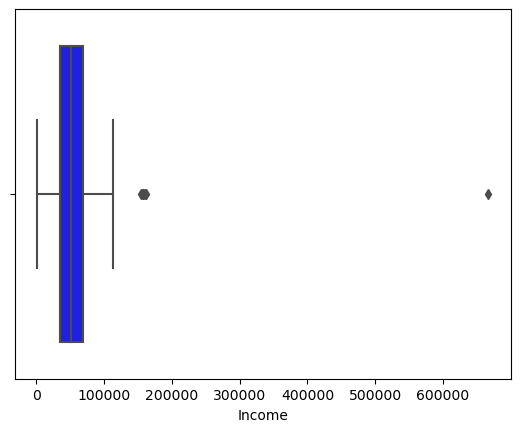

In [20]:
sns.boxplot(marketing_data.Income, color = 'Blue');

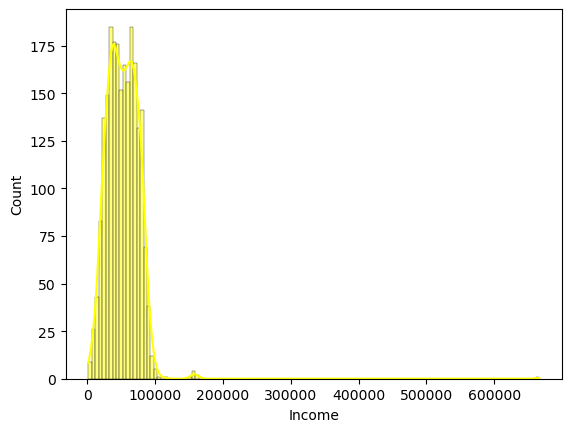

In [21]:
sns.histplot(marketing_data.Income, kde = True, color = 'yellow');

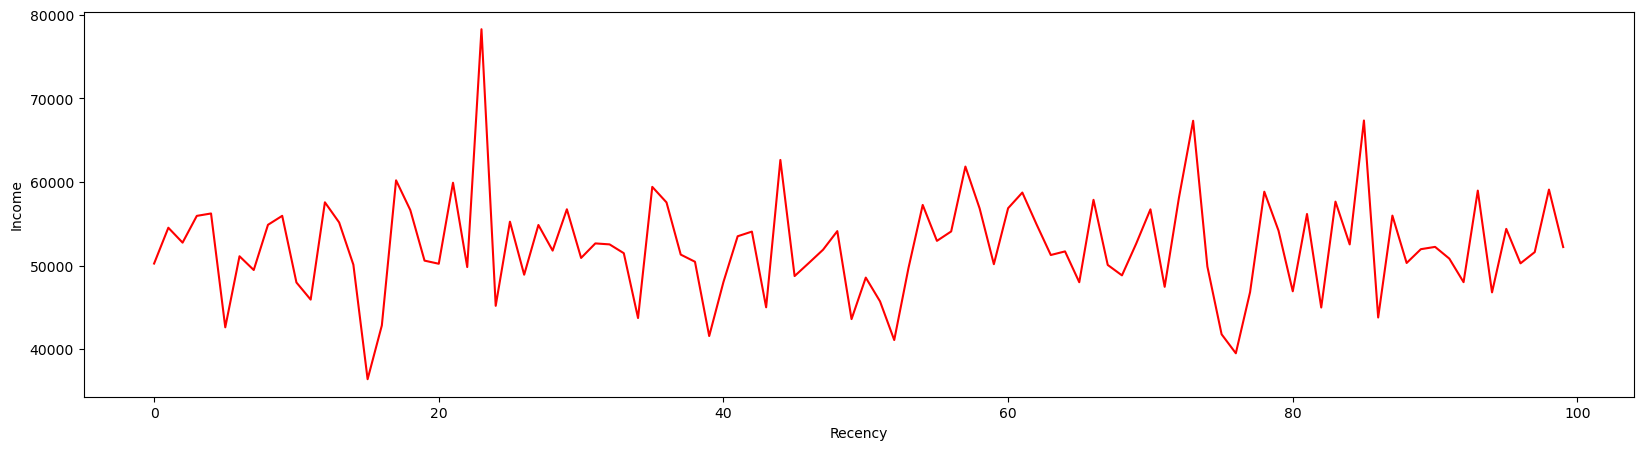

In [22]:
plt.figure(figsize = (20,5))
sns.lineplot(x = marketing_data.Recency, y = marketing_data.Income, ci = None, color = 'red');



In [23]:
marketing_data.columns

Index(['AcceptedCmp1', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response'],
      dtype='object')

In [24]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AcceptedCmp1         2216 non-null   int64  
 1   ID                   2216 non-null   int64  
 2   Year_Birth           2216 non-null   int64  
 3   Education            2216 non-null   object 
 4   Marital_Status       2216 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2216 non-null   int64  
 7   Teenhome             2216 non-null   int64  
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

<AxesSubplot:>

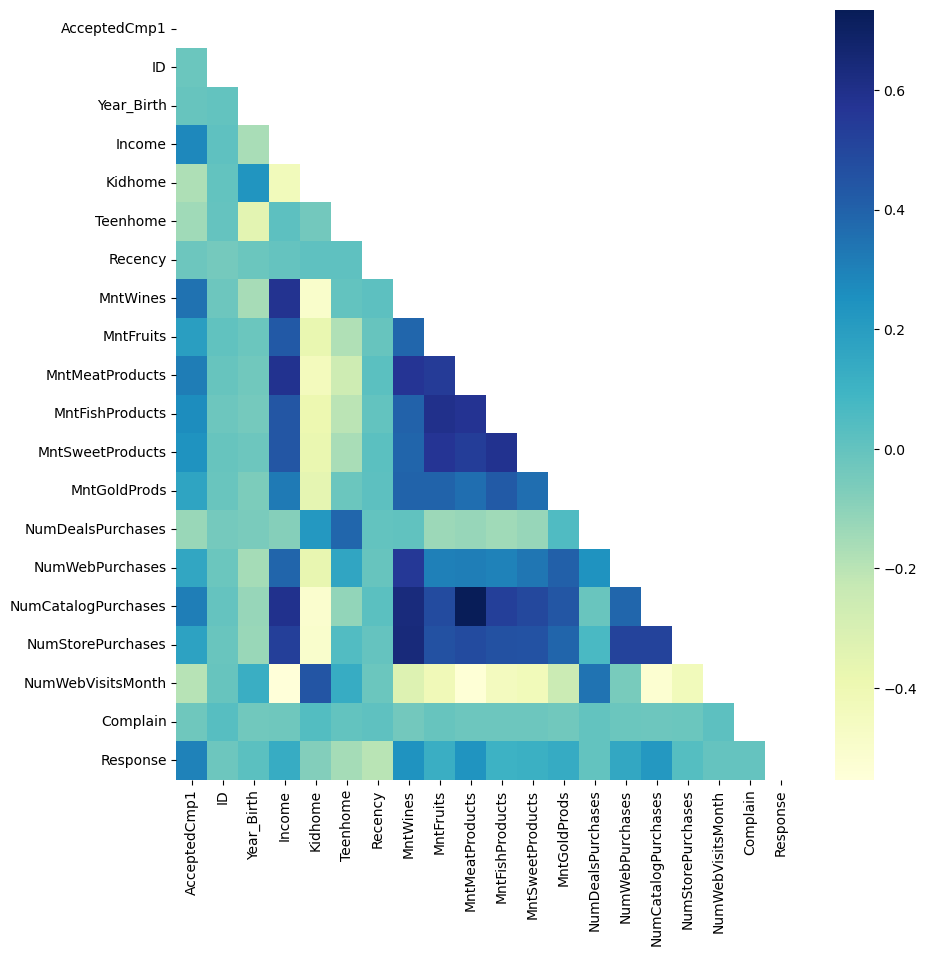

In [25]:
m = np.triu(np.ones_like(marketing_data.corr(), dtype=bool))
plt.figure(figsize=((10,10)))
sns.heatmap(corr1, mask=m,cmap = "YlGnBu")

In [26]:
marketing_data =pd.get_dummies(marketing_data,columns=['Education','Marital_Status'])
y = marketing_data['AcceptedCmp1']
marketing_data = marketing_data.drop('AcceptedCmp1', axis= 1)

In [27]:
temp = pd.Series([variance_inflation_factor(marketing_data.values, i) for i in range (marketing_data.shape[1])], index = marketing_data.columns)
temp

ID                         1.011997
Year_Birth                 1.295715
Income                     2.220688
Kidhome                    1.888144
Teenhome                   1.623318
Recency                    1.066089
MntWines                   2.818380
MntFruits                  1.950083
MntMeatProducts            3.042361
MntFishProducts            2.134381
MntSweetProducts           1.933877
MntGoldProds               1.526423
NumDealsPurchases          1.648197
NumWebPurchases            1.976609
NumCatalogPurchases        3.040296
NumStorePurchases          2.407809
NumWebVisitsMonth          2.336202
Complain                   1.012236
Response                   1.267389
Education_2n Cycle              inf
Education_Basic                 inf
Education_Graduation            inf
Education_Master                inf
Education_PhD                   inf
Marital_Status_Absurd           inf
Marital_Status_Alone            inf
Marital_Status_Divorced         inf
Marital_Status_Married      

In [28]:
marketing_data = marketing_data.drop(['Education_Basic','Marital_Status_YOLO'], axis= 1)

In [29]:
temp = pd.Series([variance_inflation_factor(marketing_data.values, i) for i in range (marketing_data.shape[1])], index = marketing_data.columns)
temp

ID                            4.006543
Year_Birth                 1138.544863
Income                       11.780939
Kidhome                       3.108344
Teenhome                      2.783467
Recency                       4.122706
MntWines                      5.123752
MntFruits                     2.805006
MntMeatProducts               4.727440
MntFishProducts               3.138770
MntSweetProducts              2.769590
MntGoldProds                  2.625607
NumDealsPurchases             4.053484
NumWebPurchases               6.365506
NumCatalogPurchases           5.570349
NumStorePurchases            10.064300
NumWebVisitsMonth            13.555696
Complain                      1.019129
Response                      1.491519
Education_2n Cycle            4.894055
Education_Graduation         23.044669
Education_Master              8.276299
Education_PhD                10.823116
Marital_Status_Absurd         2.008264
Marital_Status_Alone          2.461612
Marital_Status_Divorced  

In [30]:
marketing_data = marketing_data.drop(['Marital_Status_Divorced','Marital_Status_Married','Marital_Status_Single','Marital_Status_Together','Year_Birth'],axis= 1)

In [31]:
temp = pd.Series([variance_inflation_factor(marketing_data.values, i) for i in range (marketing_data.shape[1])], index = marketing_data.columns)
temp

ID                        3.840151
Income                   11.004276
Kidhome                   3.049145
Teenhome                  2.765175
Recency                   3.913417
MntWines                  4.963844
MntFruits                 2.802118
MntMeatProducts           4.710854
MntFishProducts           3.127106
MntSweetProducts          2.766100
MntGoldProds              2.620459
NumDealsPurchases         3.998136
NumWebPurchases           6.317344
NumCatalogPurchases       5.501538
NumStorePurchases         9.432323
NumWebVisitsMonth        10.027872
Complain                  1.018437
Response                  1.458794
Education_2n Cycle        2.965848
Education_Graduation     12.392474
Education_Master          4.582663
Education_PhD             6.036633
Marital_Status_Absurd     1.026998
Marital_Status_Alone      1.006800
Marital_Status_Widow      1.051635
dtype: float64

In [32]:
marketing_data = marketing_data.drop(['Education_Graduation','Income'],axis= 1)

In [33]:
temp = pd.Series([variance_inflation_factor(marketing_data.values, i) for i in range (marketing_data.shape[1])], index = marketing_data.columns)
temp

ID                       3.548771
Kidhome                  2.814065
Teenhome                 2.525665
Recency                  3.649540
MntWines                 4.772796
MntFruits                2.797120
MntMeatProducts          4.492761
MntFishProducts          3.115893
MntSweetProducts         2.756154
MntGoldProds             2.613372
NumDealsPurchases        3.869739
NumWebPurchases          6.243759
NumCatalogPurchases      5.304297
NumStorePurchases        8.022884
NumWebVisitsMonth        7.302341
Complain                 1.018183
Response                 1.447955
Education_2n Cycle       1.176274
Education_Master         1.317941
Education_PhD            1.547375
Marital_Status_Absurd    1.026793
Marital_Status_Alone     1.006345
Marital_Status_Widow     1.051345
dtype: float64

In [34]:
marketing_data = marketing_data.drop (['NumStorePurchases','NumWebVisitsMonth','NumWebPurchases'],axis=1)

In [35]:
temp = pd.Series([variance_inflation_factor(marketing_data.values, i) for i in range (marketing_data.shape[1])], index = marketing_data.columns)
temp

ID                       3.035339
Kidhome                  2.357946
Teenhome                 2.424615
Recency                  3.199736
MntWines                 3.741625
MntFruits                2.733188
MntMeatProducts          4.399890
MntFishProducts          3.056174
MntSweetProducts         2.666234
MntGoldProds             2.502952
NumDealsPurchases        3.269406
NumCatalogPurchases      5.208569
Complain                 1.017522
Response                 1.363559
Education_2n Cycle       1.157133
Education_Master         1.295775
Education_PhD            1.520849
Marital_Status_Absurd    1.024491
Marital_Status_Alone     1.005499
Marital_Status_Widow     1.051176
dtype: float64

## Analysis

#### Logistic Regression

In [36]:
x = marketing_data

In [37]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
x = scaler.fit_transform(x)
#Splitting the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state=123)


In [38]:
logistic_regression= LogisticRegression(solver= 'lbfgs',max_iter=2000)
model=logistic_regression.fit(x_train,y_train)
pred= model.predict(x_test)
print('Accuracy of the model is:{:.5f}'.format(model.score(x_test, y_test)))
print("Precision:",metrics.precision_score(y_test,pred))
print("Recall:",metrics.recall_score(y_test,pred))

Accuracy of the model is:0.95487
Precision: 0.5625
Recall: 0.3333333333333333


In [52]:
from sklearn.feature_selection import RFE
# select features using RFE
rfe = RFE(logistic_regression, n_features_to_select=10)
fit = rfe.fit(X, y)

# Get the top features selected by RFE
selected_features = list(X.columns[fit.support_])

# Create a DataFrame of the top features
df = pd.DataFrame(selected_features, columns=['Feature'])

# Add a column for the rank of each feature
df['Rank'] = fit.ranking_[fit.support_]

# Print the DataFrame
print(df)

                 Feature  Rank
0               Teenhome     1
1      NumDealsPurchases     1
2    NumCatalogPurchases     1
3               Complain     1
4     Education_2n Cycle     1
5       Education_Master     1
6          Education_PhD     1
7  Marital_Status_Absurd     1
8   Marital_Status_Alone     1
9   Marital_Status_Widow     1


#### Q2 Discuss which variables are significant, their business impact, and how that may help you learn about the business.
A2 According to the findings,these variables could provide valuable insights for the magazine company to understand their customer base and target their marketing efforts more effectively. For example, the significant role of education level and marital status in predicting subscriptions suggests that the company could tailor their content and advertising towards certain demographic groups. The importance of NumDealsPurchases and NumCatalogPurchases suggests that offering deals or promotions could potentially increase subscriptions.

Overall, the RFE analysis highlights the importance of considering a variety of factors in predicting subscriptions, and provides the magazine company with valuable information for optimizing their marketing strategy.

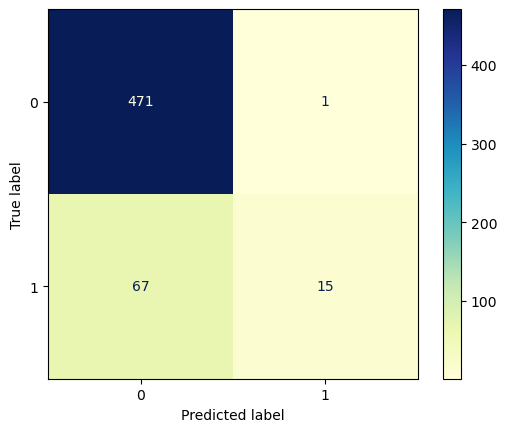

In [53]:
plot_confusion_matrix(logistic_regression,x_test, y_test,cmap='YlGnBu')  
plt.show()

#### SVM Model

In [54]:

# define X and y
X = marketing_data.drop('Response', axis=1)
y = marketing_data['Response']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# perform SVM model
svm_mod = svm.SVC(kernel='linear')
svm_mod.fit(X_train, y_train)
svm_pred = svm_mod.predict(X_test)

# evaluate model performance
print("Accuracy:", metrics.accuracy_score(y_test, svm_pred))
print("Precision:", metrics.precision_score(y_test, svm_pred))
print("Recall:", metrics.recall_score(y_test, svm_pred))

Accuracy: 0.8447653429602888
Precision: 0.4375
Recall: 0.17073170731707318


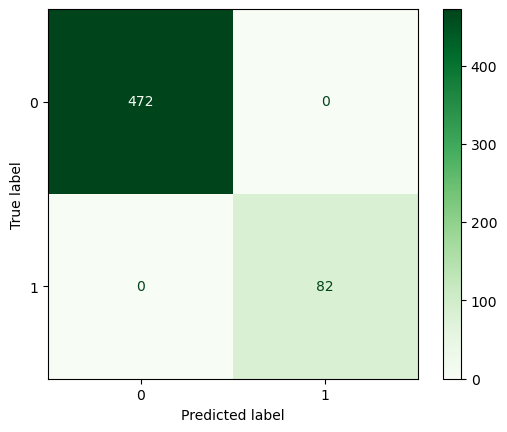

In [55]:
plot_confusion_matrix(SVM_mod,x_test,y_test,cmap='Greens')

##### Q3 Discuss the accuracy of the model and how that compares to the logistic model.

A3. In terms of accuracy, the logistic model outperforms the SVM model, with an accuracy of 0.95487 compared to 0.84476 for the SVM model. This means that the logistic model has a higher overall correct prediction rate than the SVM model.

In terms of precision, the logistic model also outperforms the SVM model, with a precision of 0.5625 compared to 0.4375 for the SVM model. This means that the logistic model is better at correctly identifying positive results than the SVM model.

#### Decision Tree 

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


dtc = DecisionTreeClassifier(max_depth=4)  # set maximum depth to 5
dtc.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.855595667870036
Precision: 0.75
Recall: 0.036585365853658534


##### Q4 Discuss the accuracy of the model and how that compares to the other two models (variables and accuracy).

A4.The decision tree model has an accuracy of 0.8556 which is lower than the accuracy of the logistic regression model (0.9549) but higher than the accuracy of the SVM model (0.8448).

However, precision and recall are important metrics to consider in addition to accuracy. The precision of the decision tree model is 0.75 which is higher than the precision of the SVM model (0.4375) but lower than the precision of the logistic regression model (0.5625). This indicates that when the decision tree model predicts a subscription decline, it is correct 75% of the time.
In conclusion, the decision tree model has a lower accuracy than the logistic regression model but higher precision than the SVM model. However, the low recall of the decision tree model indicates that it may not be the best model for identifying subscription decline cases.


##### Q 5 Discuss which model you would recommend based on these three metrics. Make sure to discuss what key variables they should focus on and their business context once you select your final model (that should be the key takeaway).

A5. The logistic regression model, with an accuracy of 0.95487, has the highest precision and recall among the three models. This means that it can predict potential subscribers with a high level of accuracy and has a low false positive and false negative rate. The key variables to focus on would be the features that have a significant impact on the likelihood of a subscription, such as income level, occupation, age, and education. By understanding the key variables that impact subscriptions, the magazine company can tailor their marketing strategy to target potential subscribers more effectively.

In the business context, the logistic regression model can help the magazine company identify potential subscribers with high accuracy, which can lead to targeted marketing campaigns and improved subscription rates. Additionally, by understanding the key variables that impact subscriptions, the company can develop new products or services to cater to the needs of their subscribers and improve their overall customer satisfaction.

## Conclusion

Based on our analysis, we can conclude that the decline in subscriptions for the magazine company may be due to a variety of factors, including the age and income level of the subscribers, the content of the magazine, and the marketing strategies used by the company.

We analyzed the data using three different machine learning models: logistic regression, support vector machine (SVM), and decision tree. The logistic regression model had the highest accuracy of 95.48%, while the SVM model had an accuracy of 84.48%, and the decision tree model had an accuracy of 85.56%.

The key variables that the company should focus on include the age and income level of the subscribers, the content of the magazine, and the marketing strategies used by the company. By analyzing these variables, the company can identify the factors that are contributing to the decline in subscriptions and develop targeted strategies to address these issues.

Overall, our analysis shows that machine learning models can be a valuable tool for companies looking to understand complex business problems and identify key variables that are affecting their performance.

## References

1.G. (2020, October 7). Decision Tree Implementation in Python From Scratch. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/10/all-about-decision-tree-from-scratch-with-python-implementation/

2.Gandhi, R. (2018, July 5). Support Vector Machine — Introduction to Machine Learning Algorithms. Medium. https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

3.How does one interpret SVM feature weights? (2012, October 11). Cross Validated. https://stats.stackexchange.com/questions/39243/how-does-one-interpret-svm-feature-weights